# Gaussian Filtering a 1-D Noisy Image

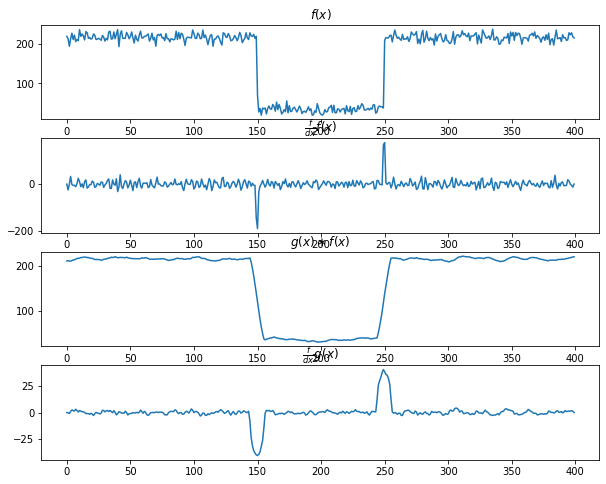

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im= np.ones((300,400),dtype=np.uint8)*255
im[:,150:250]=0

mean=0
sigma=0.05
noise = np.random.normal(mean,sigma,im.shape)
im=im.astype(np.float)/255.0

im=cv.add(im,noise)*255
im=cv.normalize(im,None,0,255,cv.NORM_MINMAX)
im=im.astype(np.uint8)

f=im[150,:]
kernel = np.array([-1,0,1])
fx= cv.filter2D(f,cv.CV_32F, kernel)

g=cv.getGaussianKernel(11,5.,cv.CV_64F)
fgf =cv.filter2D(f,cv.CV_32F,g)
fgfx=cv.filter2D(fgf,cv.CV_32F, kernel)

cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",im)
cv.waitKey(0)
cv.destroyAllWindows()

fig,ax=plt.subplots(4,figsize=(10,8))
ax[0].plot(f)
ax[0].set_title('$f(x)$')
ax[1].plot(fx)
ax[1].set_title('$ \\frac{f}{dx}f(x)$')
ax[2].plot(fgf)
ax[2].set_title('$g(x) \\ast f(x)$')
ax[3].plot(fgfx)
ax[3].set_title('$ \\frac{f}{dx}g(x) \ast f(x)$')
plt.show()

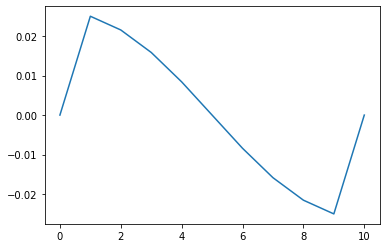

In [2]:
import cv2 as cv
gx=cv.filter2D(g,-1,kernel,cv.BORDER_CONSTANT)
plt.plot(gx)

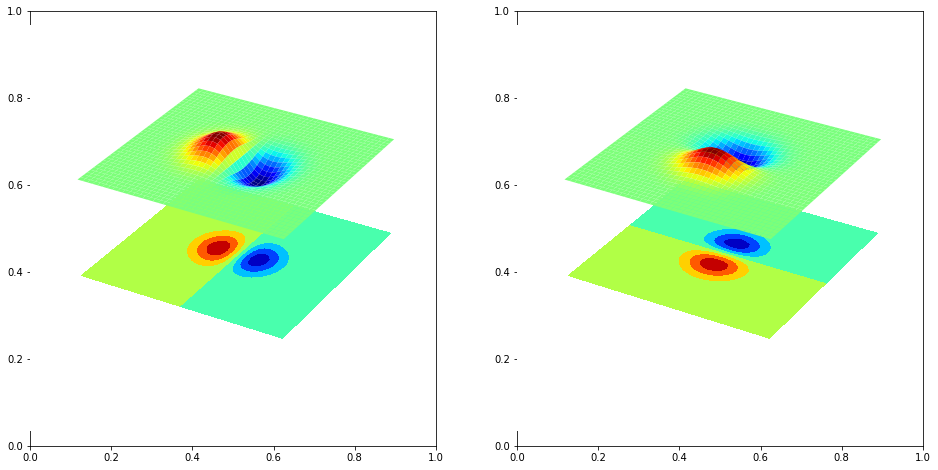

In [3]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig,ax=plt.subplots(1,2,figsize=(16,8))
ax1=fig.add_subplot(121,projection='3d')
ax2=fig.add_subplot(122,projection='3d')
sigma=1

X=np.arange(-5,5.25,0.25)
Y=np.arange(-5,5.25,0.25)
X,Y=np.meshgrid(X,Y)
Z=np.exp(-(X**2+Y**2)/(2*sigma**2))
kernel=np.array([[0,0,0],[-1,0,1],[0,0,0]],dtype=np.float)
Zx=cv.filter2D(Z,-1,kernel)
kernel=np.array([[0,-1,0],[0,0,0],[0,1,0]],dtype=np.float)
Zy=cv.filter2D(Z,-1,kernel)

#plot the surface
surf1=ax1.plot_surface(X,Y,Zx,cmap=cm.jet,linewidth=0,antialiased=True)
surf2=ax2.plot_surface(X,Y,Zy,cmap=cm.jet,linewidth=0,antialiased=True)

ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.zaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%0.2f'))

cset=ax1.contourf(X,Y,Zx,zdir='z',offset=np.min(Z)-1.5,cmap=cm.jet)
ax1.set_zlim(np.min(Zx)-2,np.max(Zx))
cset=ax2.contourf(X,Y,Zy,zdir='z',offset=np.min(Z)-1.5,cmap=cm.jet)
ax2.set_zlim(np.min(Zy)-2,np.max(Zx))

ax1.axis('off')
ax2.axis('off')

plt.show()

In [5]:
import cv2 as cv
import numpy as np
import math
hi_threshold_max=255
title_window='Canny'

ratio=0.3 #Low thresold/Hi threshold
hi_threshold=255
low_threshold=math.floor(hi_threshold*ratio)

def on_trackbar(val):
    hi_threshold=cv.getTrackbarPos(trackbar1_name,title_window)
    ratio=cv.getTrackbarPos(trackbar2_name,title_window)/100.
    low_threshold=hi_threshold*ratio
    edges=cv.Canny(im,low_threshold,hi_threshold)
    cv.imshow(title_window,edges)

im= cv.imread('im03.png',cv.IMREAD_COLOR)
if im is None:
    print('Could not open or find the image')
    exit(0)

cv.namedWindow(title_window)
trackbar1_name='High Treshold Value'
cv.createTrackbar(trackbar1_name,title_window,hi_threshold,hi_threshold_max,on_trackbar)
trackbar2_name='Low Threshold %'
cv.createTrackbar(trackbar2_name,title_window,1,100,on_trackbar)   
on_trackbar(hi_threshold)
cv.waitKey()
cv.destroyAllWindows()